# Nama : Paul Wijaya Verda Kusuma
# NIM : 215314051

### 1. Melakukan Pre-processing Data IHSG

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ihsg_data.csv")
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,^JKSE,^JKSE,^JKSE,^JKSE,^JKSE
1,Date,NaN,NaN,NaN,NaN,NaN
2,2018-03-20,6243.5771484375,6271.716796875,6207.16796875,6266.5810546875,76662600
3,2018-03-21,6312.8310546875,6315.06689453125,6260.06689453125,6260.18505859375,89583500
4,2018-03-22,6254.07421875,6351.30810546875,6252.97509765625,6331.97998046875,77992400


In [3]:
# 1. Membersihkan Header Tambahan
df = df.iloc[2:].reset_index(drop=True)

In [4]:
# 2. Mengubah Nama Kolom Agar Jelas
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

In [5]:
# 3. Konversi Kolom 'Date' ke Datetime
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
# 4. Ubah Kolom Numerik Menjadi Float
numeric_cols = ["Close", "High", "Low", "Open", "Volume"]
df[numeric_cols] = df[numeric_cols].astype(float)

In [8]:
# 5. Set Kolom Date sebagai Index
df.set_index("Date", inplace=True)

In [9]:
# 6. Resampling Data ke Frekuensi Harian (Jika Ada Hari Hilang)
df = df.asfreq("D")

In [12]:
# 7. Mengisi Missing Values Jika Ada (Interpolasi Linear)
df = df.interpolate(method='linear')

In [13]:
import matplotlib.pyplot as plt

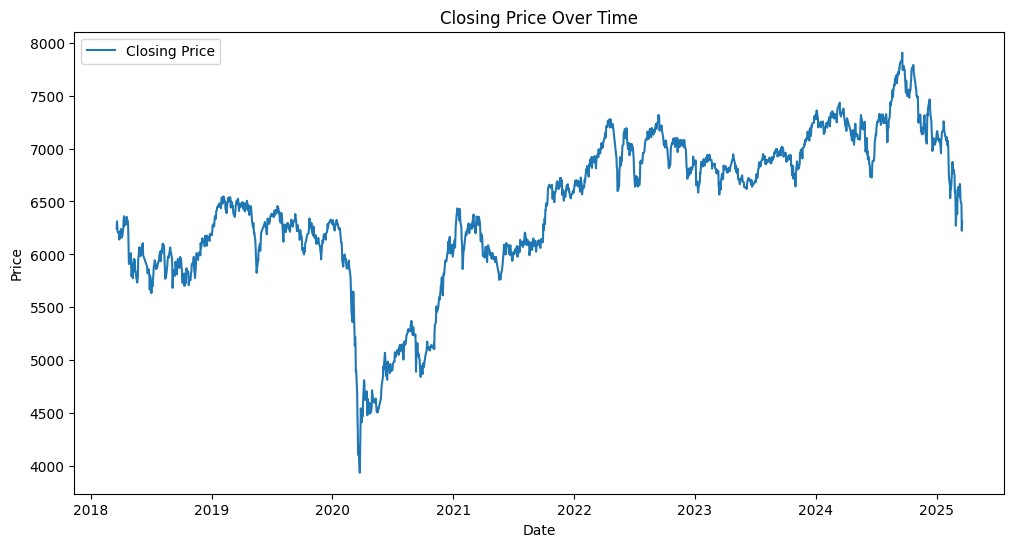

In [14]:
# 8. Plot Data untuk Melihat Tren
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Closing Price")
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
# 9. Uji Stasioneritas dengan ADF Test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("Data Stasioner")
    else:
        print("Data Tidak Stasioner")

adf_test(df["Close"].dropna())

ADF Statistic: -1.7406934292161245
p-value: 0.4102772757515749
Critical Values: {'1%': -3.4329261189937252, '5%': -2.862678123760114, '10%': -2.5673758659859454}
Data Tidak Stasioner


In [19]:
# 10. Differencing Jika Data Tidak Stasioner
df["Close_diff"] = df["Close"].diff().dropna()

In [20]:
# 11. Uji Stasioneritas Setelah Differencing
adf_test(df["Close_diff"].dropna())

ADF Statistic: -13.495024785447619
p-value: 3.0537241020076844e-25
Critical Values: {'1%': -3.4329261189937252, '5%': -2.862678123760114, '10%': -2.5673758659859454}
Data Stasioner


#### Data yang sudah dilakukan Pre-Proccesing Disimpan

In [21]:
# Simpan dataset yang sudah diproses untuk digunakan dalam ARIMA
processed_file_path = "ihsg_data_processed.csv"
df.to_csv(processed_file_path)

### 2. Forecasting Menggunakan ARIMA Model Untuk Dataset yang sudah di PRE_PROCESSING

In [23]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [24]:
# Load dataset hasil preprocessing
file_path = "ihsg_data_processed.csv"
df = pd.read_csv(file_path, index_col="Date", parse_dates=True)

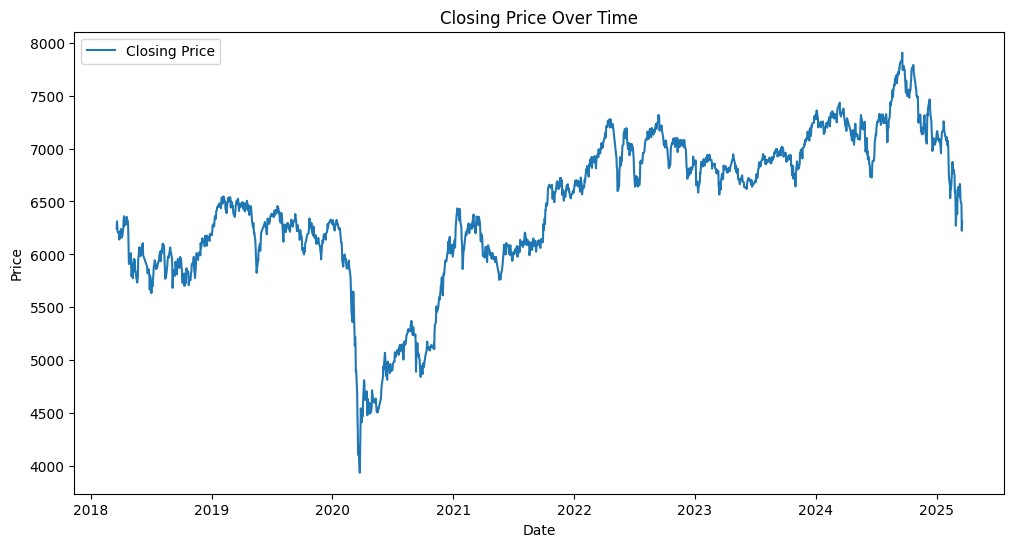

In [25]:
# 1. Plot Data untuk Melihat Tren
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Closing Price")
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

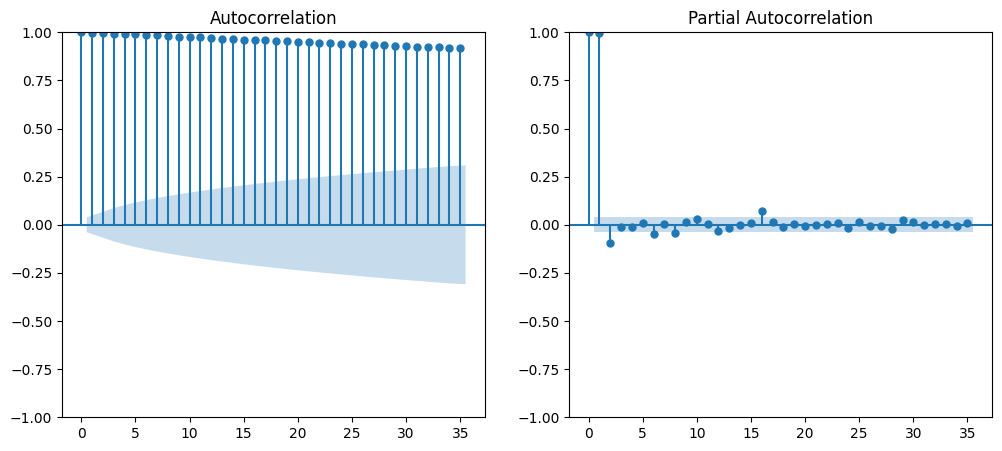

In [26]:
# 2. Plot ACF dan PACF untuk Menentukan p dan q
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df["Close"].dropna(), ax=ax[0])
plot_pacf(df["Close"].dropna(), ax=ax[1])
plt.show()


In [31]:
# 3. Latih Model ARIMA
# Parameter ARIMA (p, d, q) - Sesuaikan berdasarkan ACF, PACF & ADF Test
p, d, q = 5, 1, 0  # Contoh nilai, bisa diuji lebih lanjut
model = ARIMA(df["Close"], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2557
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -13243.859
Date:                Thu, 03 Apr 2025   AIC                          26499.718
Time:                        23:07:59   BIC                          26534.795
Sample:                    03-20-2018   HQIC                         26512.439
                         - 03-19-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0920      0.013      7.346      0.000       0.067       0.117
ar.L2          0.0155      0.015      1.011      0.312      -0.015       0.046
ar.L3          0.0065      0.018      0.353      0.7

In [38]:
# 4. Forecasting ke Depan
forecast_steps = 360
forecast = model_fit.forecast(steps=forecast_steps)

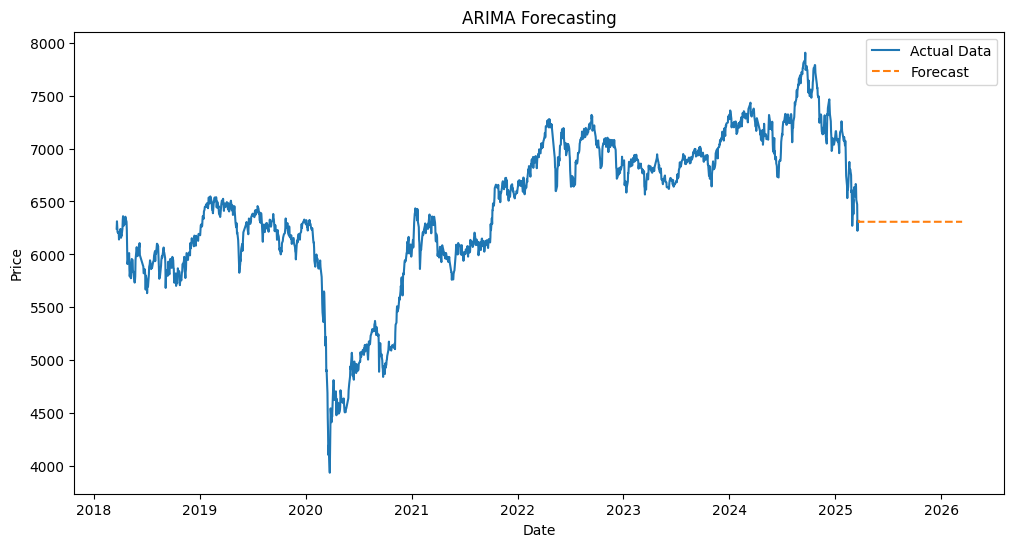

In [39]:
# 6. Plot Hasil Forecasting
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Actual Data")
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq="D")[1:], forecast, label="Forecast", linestyle='dashed')
plt.title("ARIMA Forecasting")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()